# Disneyland Reviews

Disney is a global entertainment company that operates theme parks, resorts, and media networks around the world. One of the most important aspects of running a successful theme park is providing visitors with an enjoyable and memorable experience. In today's digital age, social media platforms like TripAdvisor provide an important channel for customers to share their feedback and experiences.

In this Jupyter Notebook, we will perform topic modeling and sentiment analysis on the reviews posted by visitors on TripAdvisor for three Disney parks - Paris, California, and Hong Kong. By analyzing the reviews, we can gain valuable insights into the themes and sentiments that are most commonly expressed by visitors to these parks. These insights can then be used to improve the overall experience for visitors and ultimately drive business value for Disney as a company.

The dataset can be found in Kaggle: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("DisneylandReviews.csv", encoding="ISO-8859-1")


# Balancing dataset by branch
h_df = df.loc[df['Branch'] == 'Disneyland_HongKong'][:5000]
p_df = df.loc[df['Branch'] == 'Disneyland_California'][:5000]
c_df = df.loc[df['Branch'] == 'Disneyland_Paris'][:5000]


df = pd.concat([h_df, p_df, c_df])

# count the values of each branch
counts = df['Branch'].value_counts()


print(counts)
df.to_csv("DisneyReviews.csv")

Branch
Disneyland_HongKong      5000
Disneyland_California    5000
Disneyland_Paris         5000
Name: count, dtype: int64


## Data preparation

   ### Language Detection

Language detection is an essential step in text analytics because it allows us to accurately analyze and interpret textual data based on the language it is written. 

In this dataset we can see that practically all reviews are in English, therefore the rows that are in other languages will be filtered out.

In [3]:
from langdetect import detect
import matplotlib.pyplot as plt

# Detect language of reviews
df['language']= df['Review_Text'].apply(lambda x: detect(x))

# Count the frequency of each language
language_count = df['language'].value_counts()
print(language_count)

# Filter only english reviews
df= df[df['language'] == 'en']


language
en    14999
nl        1
Name: count, dtype: int64


### Sentence Breaking

Sentence breaking involves identifying the boundaries between sentences in a given text. This process is crucial in topic modeling as it allows for a more accurate understanding of the context and meaning of individual sentences. Similarly, in sentiment analysis, sentence breaking helps to extract sentiments at the sentence level, which provides a more granular and nuanced analysis of the text.

In [4]:
import nltk
df['sentences'] = df['Review_Text'].apply(nltk.sent_tokenize)
df[['Review_Text','sentences']].head()
df.iloc[0,7]

["If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street!",
 'It has a very familiar feel.',
 'One of the rides  its a Small World  is absolutely fabulous and worth doing.',
 'The day we visited was fairly hot and relatively busy but the queues moved fairly well.']

### Tokenization

Tokenization is the process of breaking down a sentence or text into individual words or tokens. It is important in topic modeling and sentiment analysis as it allows for the analysis of the frequency and distribution of specific words within a text, which provides insights into the topics being discussed and the sentiment expressed towards them. Tokenization also helps in reducing the complexity of the text data, making it easier to process and analyze.

In [5]:
from nltk.tokenize import word_tokenize

# Define a function to tokenize sentences
def tokenize_sentences(row):
    return [nltk.word_tokenize(row)]

# Apply the function to each row
df['tokens'] = df['Review_Text'].apply(tokenize_sentences)

df.iloc[0,8]

[['If',
  'you',
  "'ve",
  'ever',
  'been',
  'to',
  'Disneyland',
  'anywhere',
  'you',
  "'ll",
  'find',
  'Disneyland',
  'Hong',
  'Kong',
  'very',
  'similar',
  'in',
  'the',
  'layout',
  'when',
  'you',
  'walk',
  'into',
  'main',
  'street',
  '!',
  'It',
  'has',
  'a',
  'very',
  'familiar',
  'feel',
  '.',
  'One',
  'of',
  'the',
  'rides',
  'its',
  'a',
  'Small',
  'World',
  'is',
  'absolutely',
  'fabulous',
  'and',
  'worth',
  'doing',
  '.',
  'The',
  'day',
  'we',
  'visited',
  'was',
  'fairly',
  'hot',
  'and',
  'relatively',
  'busy',
  'but',
  'the',
  'queues',
  'moved',
  'fairly',
  'well',
  '.']]

### Remove stop words

Stop words are commonly used words that do not carry significant meaning and can introduce noise into the analysis. Removing them improves the accuracy of text analysis by focusing on the more meaningful words in the text.

In [6]:
# Creating a list of all NLTK stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say','could', '_', 'be', 
                   'know', 'good', 'go', 'get', 'do', 'done', 'try','many', 'some', 'nice', 'thank', 
                   'think', 'see', 'rather', 'easy', 'easily','lot', 'lack', 'make', 'want', 'seem', 
                   'run', 'need', 'even', 'right', 'line','even', 'also', 'may', 'take', 'come','really', 'disney','disneyland','park'])

In [7]:
# Define a function to remove stopwords from each sentence
from nltk.corpus import stopwords
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say','could', '_', 'be', 
                   'know', 'good', 'go', 'get', 'do', 'done', 'try','many', 'some', 'nice', 'thank', 
                   'think', 'see', 'rather','lot', 'lack', 'make', 'want', 'seem', 
                   'run', 'need', 'even', 'right', 'line','even', 'also', 'may', 'take', 'come','really', 'disney','disneyland','park'])
    filtered_words = [word for word in sentence if word.lower() not in stop_words]
    return filtered_words


# Apply the function to each row
df['stop'] = df['tokens'].apply(lambda x: [remove_stopwords(sentence) for sentence in x])

### POS Tagging

Part of Speech (POS) Tagging helps to identify the grammatical structure of sentences, which is essential for many natural language processing tasks, such as sentiment analysis. Additionally, POS tagging allows for more accurate feature extraction and classification of text data, improving the performance of machine learning models.

In [8]:
# Apply the function to each row
df['pos'] = df['stop'].apply(lambda x: [nltk.pos_tag(sentence) for sentence in x])


In [9]:
df.iloc[0,10]

[[("'ve", 'VBP'),
  ('ever', 'RB'),
  ('anywhere', 'RB'),
  ("'ll", 'MD'),
  ('find', 'VB'),
  ('Hong', 'NNP'),
  ('Kong', 'NNP'),
  ('similar', 'JJ'),
  ('layout', 'NN'),
  ('walk', 'NN'),
  ('main', 'JJ'),
  ('street', 'NN'),
  ('!', '.'),
  ('familiar', 'JJ'),
  ('feel', 'NN'),
  ('.', '.'),
  ('One', 'CD'),
  ('rides', 'VBZ'),
  ('Small', 'NNP'),
  ('World', 'NNP'),
  ('absolutely', 'RB'),
  ('fabulous', 'JJ'),
  ('worth', 'NN'),
  ('.', '.'),
  ('day', 'NN'),
  ('visited', 'VBD'),
  ('fairly', 'RB'),
  ('hot', 'JJ'),
  ('relatively', 'RB'),
  ('busy', 'JJ'),
  ('queues', 'NNS'),
  ('moved', 'VBD'),
  ('fairly', 'RB'),
  ('well', 'RB'),
  ('.', '.')]]

### Remove punctuation

Removing punctuation helps in standardizing the text and making it uniform for analysis. In addition, we are decontracting some words by replacing contractions like 've with their original base, such as have.

In [10]:
import string

# Define a function to remove punctuation from each sentence in a row
def remove_punctuation(tokens):
    # List of punctuation to remove
    punct = string.punctuation
    # Loop through each sentence in the row
    return [[(word, tag) for word, tag in sentence if word not in punct] for sentence in tokens]

# Apply the function to each row
df['pos'] = df['pos'].apply(remove_punctuation)
df.iloc[0,10]

[[("'ve", 'VBP'),
  ('ever', 'RB'),
  ('anywhere', 'RB'),
  ("'ll", 'MD'),
  ('find', 'VB'),
  ('Hong', 'NNP'),
  ('Kong', 'NNP'),
  ('similar', 'JJ'),
  ('layout', 'NN'),
  ('walk', 'NN'),
  ('main', 'JJ'),
  ('street', 'NN'),
  ('familiar', 'JJ'),
  ('feel', 'NN'),
  ('One', 'CD'),
  ('rides', 'VBZ'),
  ('Small', 'NNP'),
  ('World', 'NNP'),
  ('absolutely', 'RB'),
  ('fabulous', 'JJ'),
  ('worth', 'NN'),
  ('day', 'NN'),
  ('visited', 'VBD'),
  ('fairly', 'RB'),
  ('hot', 'JJ'),
  ('relatively', 'RB'),
  ('busy', 'JJ'),
  ('queues', 'NNS'),
  ('moved', 'VBD'),
  ('fairly', 'RB'),
  ('well', 'RB')]]

In [11]:
import re

def contractions(row):
    cleaned_row = []
    for sentence in row:
        cleaned_sentence = []
        for word, tag in sentence:
            # replace contractions
            word = re.sub(r"n't", " not", word)
            word = re.sub(r"'s", " ", word)
            word = re.sub(r"'ve", " have", word)
            word = re.sub(r"'re", " are", word)
            word = re.sub(r"'d", " would", word)
            word = re.sub(r"'ll", " will", word)

            # convert to lowercase and strip whitespace
            word = word.lower().strip()
            
            # append cleaned word and tag
            cleaned_sentence.append((word, tag))
        
        # append cleaned sentence to row
        cleaned_row.append(cleaned_sentence)
    
    return cleaned_row

# Apply the function to each row
df['pos'] = df['pos'].apply(contractions)
df.iloc[0,10]

[[('have', 'VBP'),
  ('ever', 'RB'),
  ('anywhere', 'RB'),
  ('will', 'MD'),
  ('find', 'VB'),
  ('hong', 'NNP'),
  ('kong', 'NNP'),
  ('similar', 'JJ'),
  ('layout', 'NN'),
  ('walk', 'NN'),
  ('main', 'JJ'),
  ('street', 'NN'),
  ('familiar', 'JJ'),
  ('feel', 'NN'),
  ('one', 'CD'),
  ('rides', 'VBZ'),
  ('small', 'NNP'),
  ('world', 'NNP'),
  ('absolutely', 'RB'),
  ('fabulous', 'JJ'),
  ('worth', 'NN'),
  ('day', 'NN'),
  ('visited', 'VBD'),
  ('fairly', 'RB'),
  ('hot', 'JJ'),
  ('relatively', 'RB'),
  ('busy', 'JJ'),
  ('queues', 'NNS'),
  ('moved', 'VBD'),
  ('fairly', 'RB'),
  ('well', 'RB')]]

### Normalization or Lemmatization

Lemmatization reduces words to their base or dictionary form, making it easier to analyze and understand text. For example in the review "I really loved seeing all the different Disney characters in the parade!", the sentence would be reduced to: "I really love see all the different Disney character in the parade!"

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.ADJ_SAT
    
def lemmatize_row(row):
    return [lemmatize_text(pos_tags) for pos_tags in row]

def lemmatize_text(pos_tags):
    return [lemmatizer.lemmatize(token, wordnet_pos(pos_tag)).lower() for (token, pos_tag) in pos_tags]

def lemmatize_text(pos_tags):
    return [lemmatizer.lemmatize(token, wordnet_pos(pos_tag)).lower() for (token, pos_tag) in pos_tags]

# Apply the function to each row
df['lem'] = df['pos'].apply(lemmatize_row)
df.iloc[2,11]

[['thanks',
  'god',
  'hot',
  'humid',
  'visit',
  'otherwise',
  'big',
  'issue',
  'shade',
  '.i',
  'arrive',
  'around',
  '10:30am',
  'leave',
  '6pm',
  'unfortunately',
  'last',
  'evening',
  'parade',
  '8.5',
  'hour',
  'much',
  'me.there',
  'plenty',
  'everyone',
  'find',
  'something',
  'interesting',
  'enjoy.it',
  'extremely',
  'busy',
  'long',
  'time',
  'queue',
  'certain',
  'attraction',
  '45',
  'minute',
  'bad',
  '.although',
  'amazing',
  'time',
  'felt',
  'bit',
  'underwhelmed',
  'choice',
  'ride',
  'attraction',
  'quite',
  'small',
  'expect',
  'something',
  'grand',
  'main',
  'castle',
  'close',
  'way',
  'quite',
  'small',
  '.the',
  'food',
  'option',
  'coffee',
  'shop',
  'include',
  'starbucks',
  'plenty',
  'gift',
  'shop',
  'issue',
  'toilets',
  'everywhere.all',
  'together',
  'great',
  'day',
  'enjoy']]

In [13]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,language,sentences,tokens,stop,pos,lem
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,en,[If you've ever been to Disneyland anywhere yo...,"[[If, you, 've, ever, been, to, Disneyland, an...","[['ve, ever, anywhere, 'll, find, Hong, Kong, ...","[[(have, VBP), (ever, RB), (anywhere, RB), (wi...","[[have, ever, anywhere, will, find, hong, kong..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,en,[Its been a while since d last time we visit H...,"[[Its, been, a, while, since, d, last, time, w...","[[since, last, time, visit, HK, .., Yet, ,, ti...","[[(since, IN), (last, JJ), (time, NN), (visit,...","[[since, last, time, visit, hk, .., yet, time,..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,en,[Thanks God it wasn t too hot or too humid w...,"[[Thanks, God, it, wasn, t, too, hot, or, too,...","[[Thanks, God, hot, humid, visiting, otherwise...","[[(thanks, NNS), (god, NNP), (hot, JJ), (humid...","[[thanks, god, hot, humid, visit, otherwise, b..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,en,"[HK Disneyland is a great compact park., Unfor...","[[HK, Disneyland, is, a, great, compact, park,...","[[HK, great, compact, ., Unfortunately, quite,...","[[(hk, NNP), (great, JJ), (compact, JJ), (unfo...","[[hk, great, compact, unfortunately, quite, bi..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,en,"[the location is not in the city, took around ...","[[the, location, is, not, in, the, city, ,, to...","[[location, city, ,, took, around, 1, hour, Ko...","[[(location, NN), (city, NN), (took, VBD), (ar...","[[location, city, take, around, 1, hour, kowlo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
34021,373469732,1,2016-5,United Kingdom,Spent the best part of Saturday at Disneyland ...,Disneyland_Paris,en,[Spent the best part of Saturday at Disneyland...,"[[Spent, the, best, part, of, Saturday, at, Di...","[[Spent, best, part, Saturday, left, feeling, ...","[[(spent, NNP), (best, JJS), (part, NN), (satu...","[[spent, best, part, saturday, leave, feeling,..."
34022,373462167,3,2016-5,Italy,...to come back after almost 20 years and to r...,Disneyland_Paris,en,[...to come back after almost 20 years and to ...,"[[..., to, come, back, after, almost, 20, year...","[[..., back, almost, 20, years, realise, great...","[[(..., :), (back, RB), (almost, RB), (20, CD)...","[[..., back, almost, 20, year, realise, great,..."
34023,373441401,4,2016-5,United Kingdom,Fantastic place to take children of all ages. ...,Disneyland_Paris,en,[Fantastic place to take children of all ages....,"[[Fantastic, place, to, take, children, of, al...","[[Fantastic, place, children, ages, ., seems, ...","[[(fantastic, JJ), (place, NN), (children, NNS...","[[fantastic, place, child, age, seem, magical...."
34024,373394304,2,2016-5,United Kingdom,A great experience as one would expect. Great ...,Disneyland_Paris,en,"[A great experience as one would expect., Grea...","[[A, great, experience, as, one, would, expect...","[[great, experience, one, expect, ., Great, ri...","[[(great, JJ), (experience, NN), (one, CD), (e...","[[great, experience, one, expect, great, rides..."


In [14]:
# iterate through the lists in the original row and append a new row to the new dataframe
# create a new empty dataframe
new_df = df[['Review_ID','lem']]

# create a new column with lists as rows
new_df['review_text_list'] = df['lem'].apply(lambda x: [x])
new_df = new_df.explode('review_text_list')
new_df = new_df.explode('review_text_list')

new_df = new_df.drop('lem', axis=1)

# rename the new column
new_df = new_df.rename(columns={'Review_Text_List': 'lem'})
new_df = new_df.reset_index(drop=True)

#new_df.iloc[0,1]


new_df['review_text_list'] = new_df['review_text_list'].apply(lambda row: ' '.join(row))
new_df

<ipython-input-14-f6d9985cb908>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['review_text_list'] = df['lem'].apply(lambda x: [x])


,Review_ID,review_text_list
0,670772142,have ever anywhere will find hong kong similar...
1,670682799,since last time visit hk .. yet time stay tomo...
2,670623270,thanks god hot humid visit otherwise big issue...
3,670607911,hk great compact unfortunately quite bit maint...
4,670607296,location city take around 1 hour kowlon kid li...
...,...,...
14994,373469732,spent best part saturday leave feeling disappo...
14995,373462167,... back almost 20 year realise great place ch...
14996,373441401,fantastic place child age seem magical.fantasy...
14997,373394304,great experience one expect great rides kid we...


## Sentiment Analysis

Sentiment Analysis analyzes the text to determine the writer's emotional tone, opinion or attitude towards a topic or product. 

A score of -1 indicates extremely negative sentiment, a score of +1 indicates extremely positive sentiment, and a score of 0 indicates neutral sentiment.

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = new_df
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text).get("compound")
    if scores>= 0.05:
        sentiment = "Positive"
    elif scores <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return scores,sentiment

# apply get_sentiment function
sentiment[['scores','sentiment']] = sentiment['review_text_list'].apply(lambda x: pd.Series(get_sentiment(x)))

# transform to csv for visualizations
sentiment.to_csv("sentiment.csv")

sentiment.head(10)

,Review_ID,review_text_list,scores,sentiment
0,670772142,have ever anywhere will find hong kong similar...,0.7889,Positive
1,670682799,since last time visit hk .. yet time stay tomo...,0.9821,Positive
2,670623270,thanks god hot humid visit otherwise big issue...,0.9769,Positive
3,670607911,hk great compact unfortunately quite bit maint...,0.8658,Positive
4,670607296,location city take around 1 hour kowlon kid li...,0.5106,Positive
5,670591897,world anaheim tokyo feel hong kong small call ...,-0.3900,Negative
6,670585330,great place day wo not obviously go daughter a...,0.5879,Positive
7,670574142,intro magic little one almost attraction compl...,0.7464,Positive
8,670571027,feel let place train fantastic past station ba...,0.3468,Positive
9,670570869,talk whatever less childhood dream true start ...,0.9482,Positive


## Wordcloud 

In [16]:
# Creating a nested list out of the reviews

topic_lis = df.lem.tolist()

In [17]:
from collections import Counter

cnt_topic = Counter()
for review in topic_lis:
    for sentence in review:
        for word in sentence:
            cnt_topic[word] += 1

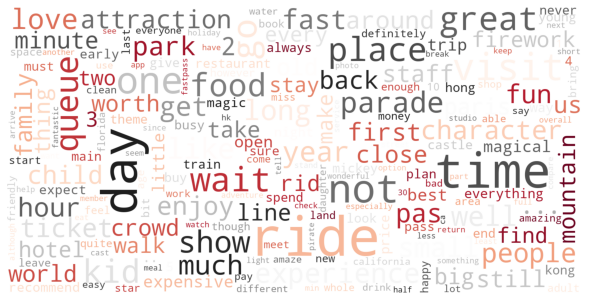

In [18]:
from wordcloud import WordCloud


wordcloud = WordCloud(stopwords=stop_words, max_font_size=150, background_color='white', colormap = "RdGy", width=1600, height=800).generate_from_frequencies(cnt_topic)

       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**As we can see, the word cloud does not give us a lot of information and it is difficult to extract any key insights from it. The most common words are general verbs or variations of disneyland and park**

## Topic Modeling

In [34]:
topic = new_df[['Review_ID','review_text_list']].copy()
topic

,Review_ID,review_text_list
0,670772142,have ever anywhere will find hong kong similar...
1,670682799,since last time visit hk .. yet time stay tomo...
2,670623270,thanks god hot humid visit otherwise big issue...
3,670607911,hk great compact unfortunately quite bit maint...
4,670607296,location city take around 1 hour kowlon kid li...
...,...,...
14994,373469732,spent best part saturday leave feeling disappo...
14995,373462167,... back almost 20 year realise great place ch...
14996,373441401,fantastic place child age seem magical.fantasy...
14997,373394304,great experience one expect great rides kid we...


#### tf-idf, SVD and tsne-idf
Vectorize each news article into a two-dimentional vector and check the scatterplot.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vect = vectorizer.fit_transform(topic['review_text_list'])
#vect = vectorizer.fit_transform([" ".join(news) for news in bbc_data_ready])

print(vect.shape)

(14999, 23846)


In [21]:
print(vectorizer.idf_)
print(vectorizer.vocabulary_)

[5.13934193 8.66989533 7.57128304 ... 8.53636394 8.05085612 8.82404601]
{'hong': 9485, 'kong': 10623, 'similar': 18753, 'layout': 10854, 'walk': 22679, 'main': 12182, 'street': 19836, 'familiar': 7278, 'feel': 7587, 'rid': 17298, 'small': 18899, 'world': 23420, 'absolutely': 632, 'fabulous': 7212, 'worth': 23544, 'day': 4760, 'visit': 22197, 'fairly': 7260, 'hot': 9545, 'relatively': 17005, 'busy': 2751, 'queue': 16406, 'hong kong': 9487, 'walk main': 22719, 'main street': 12203, 'rid small': 17382, 'small world': 18992, 'worth day': 23564, 'day visit': 5193, 'busy queue': 2789, 'queue fairly': 16468, 'time': 20791, 'hk': 9375, 'stay': 19656, 'tomorrowland': 21346, 'aka': 1041, 'marvel': 12445, 'land': 10730, 'iron': 10196, 'man': 12328, 'experience': 6950, 'newly': 13540, 'open': 13921, 'ant': 1292, 'wasp': 22879, 'ironman': 10199, 'great': 8736, 'feature': 7574, 'exciting': 6755, 'especially': 6580, 'scenery': 18288, 'central': 3187, 'area': 1399, 'kowloon': 10693, 'previous': 16069,

In [22]:
# Dimension deduction using SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vect)

print(svd_tfidf.shape)

(14999, 50)


In [23]:
rev_len = df.Review_Text.apply(lambda x: len(x))

In [24]:
# Dimension deduction using TSNE
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)
print(tsne_tfidf.shape)

tsne_tfidf_df = pd.DataFrame(tsne_tfidf)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df["Content"] = df["Review_Text"]
tsne_tfidf_df["Length"] = rev_len


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14999 samples in 0.001s...
[t-SNE] Computed neighbors for 14999 samples in 0.746s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14999
[t-SNE] Computed conditional probabilities for sample 2000 / 14999
[t-SNE] Computed conditional probabilities for sample 3000 / 14999
[t-SNE] Computed conditional probabilities for sample 4000 / 14999
[t-SNE] Computed conditional probabilities for sample 5000 / 14999
[t-SNE] Computed conditional probabilities for sample 6000 / 14999
[t-SNE] Computed conditional probabilities for sample 7000 / 14999
[t-SNE] Computed conditional probabilities for sample 8000 / 14999
[t-SNE] Computed conditional probabilities for sample 9000 / 14999
[t-SNE] Computed conditional probabilities for sample 10000 / 14999
[t-SNE] Computed conditional probabilities for sample 11000 / 14999
[t-SNE] Computed conditional probabilities for sample 12000 / 14999
[t-SNE] Computed conditional probabilities for sam

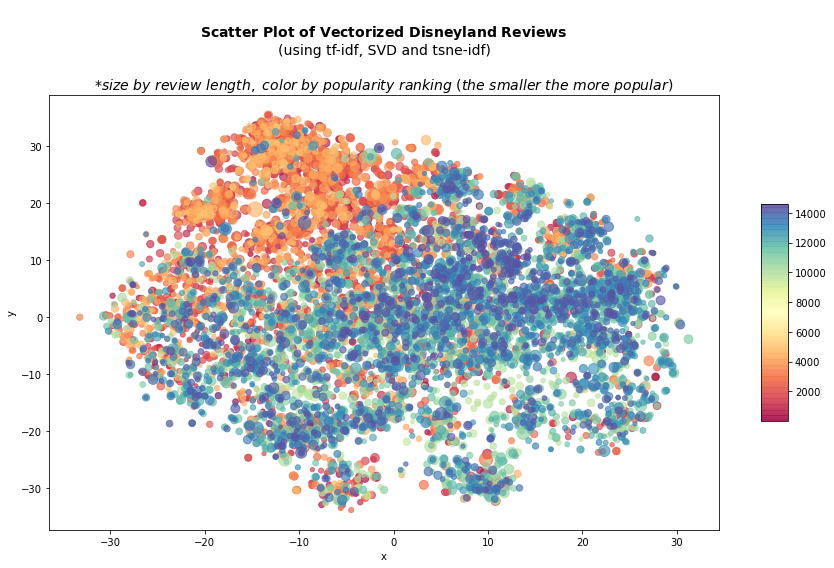

In [25]:
fig, ax = plt.subplots(figsize=(15, 8), dpi = 72)
ax.margins(0.05) 
sc = ax.scatter(tsne_tfidf_df.x, tsne_tfidf_df.y, s = tsne_tfidf_df.Length**0.6, c = np.arange(1, len(tsne_tfidf_df)+1), alpha = 0.65, cmap = "Spectral")
fig.colorbar(sc, shrink=0.5, aspect=8, pad = 0.05)
ax.set(ylabel='y', xlabel='x')
plt.title("\n"+r'$\bf{Scatter\ Plot\ of\ Vectorized \ Disneyland\ Reviews}$'+
          "\n(using tf-idf, SVD and tsne-idf)\n\n"+r"$\it{*size\ by\ review\ length,\ color\ by\ popularity\ ranking\ (the\ smaller\ the\ more\ popular)}$", 
          fontdict=dict(size=14))
plt.show()

### Topic Modelling Method : K-means

In [26]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from tqdm import tqdm, tqdm_notebook

##### Check cluster number using distortion and silhouette score

In [27]:
distorsions = []
silhouettes = []
k_max = 30

for k in tqdm_notebook(range(2, k_max)):
    kmeans_model = MiniBatchKMeans(n_clusters = k, init = "k-means++", n_init = 1, 
                                   random_state = 42, init_size = 1000, verbose = False, max_iter = 1000)
    kmeans_model.fit(vect)
    score = silhouette_score(vect, kmeans_model.labels_)
    silhouettes.append(score)
    distorsions.append(kmeans_model.inertia_)

<ipython-input-27-d10c74f9b713>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(2, k_max)):


  0%|          | 0/28 [00:00<?, ?it/s]

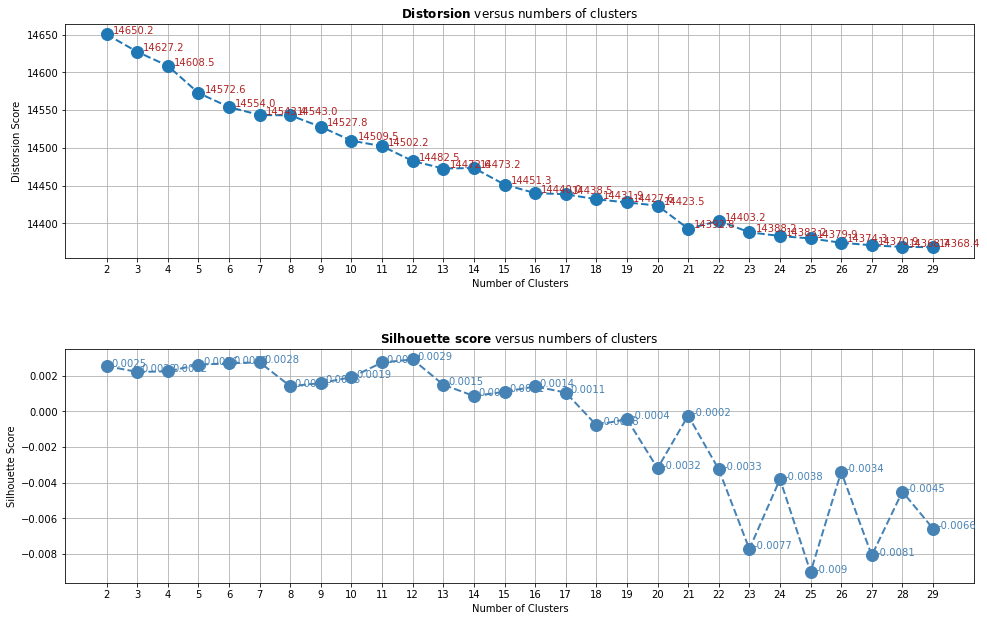

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = False, sharey = False, figsize = (15, 10), dpi = 72)
fig.tight_layout(pad=7)

ax1.plot(range(2, k_max), distorsions, marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax1.set_title(r"$\bf{Distorsion}$"+" versus numbers of clusters")
for i,j in zip(np.arange(2, k_max),distorsions):
    ax1.annotate(str(round(j,1)),xy=(i+0.2,j+1), color = "firebrick")
ax1.set_xticks(np.arange(2, k_max, 1))
ax1.set(ylabel='Distorsion Score', xlabel='Number of Clusters')
ax1.grid(True)

ax2.plot(range(2, k_max), silhouettes, marker='o', linestyle='dashed', linewidth=2, markersize=12, color = "steelblue")
ax2.set_title(r"$\bf{Silhouette\ score}$"+" versus numbers of clusters")
for i,j in zip(np.arange(2, k_max),silhouettes):
    ax2.annotate(str(round(j,4)),xy=(i+0.15,j), color = "steelblue")
ax2.set_xticks(np.arange(2, k_max, 1))
ax2.set(ylabel='Silhouette Score', xlabel='Number of Clusters')
ax2.grid(True)

We Choose **12** as the number of cluster since it's with the best silhouette score and relatively good distorsion

#### Run K-means with optimum clusters to extract topic information

In [29]:
K = 12

kmeans_model = MiniBatchKMeans(n_clusters = K, init = "k-means++", n_init = 1, 
                               random_state = 42, init_size = 1000, verbose = False, max_iter = 1000)
kmeans = kmeans_model.fit(vect)
kmeans_clusters = kmeans.predict(vect)
kmeans_distances = kmeans.transform(vect)

In [30]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
vectorizer.fit_transform(topic['review_text_list'])
terms = vectorizer.get_feature_names_out()

all_keywords = []
for i in range(K):
    topic_keywords = []
    for j in sorted_centroids[i, :10]:
        topic_keywords.append(terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['Topic {0}'.format(i+1) for i in range(K)], 
                           columns=['Keyword {0}'.format(i+1) for i in range(10)],
                           data=all_keywords)
display(keywords_df.T)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12
Keyword 1,brilliant,kid,magic kingdom,world,great,day,fast,ride,place,mountain,game,hong
Keyword 2,staff,love,kingdom,small,great time,ticket,pas,day,happy,ride,place,kong
Keyword 3,clean,ride,magic,park,year,food,fast pas,time,earth,space mountain,play,hong kong
Keyword 4,hotel,fun,orlando,paris,time,buy,ride,queue,place earth,space,fun,visit
Keyword 5,friendly,enjoy,time,visit,old,time,time,wait,happy place,thunder,day,day
Keyword 6,park,day,world,florida,year old,ride,day,visit,visit,time,visit,ride
Keyword 7,staff friendly,visit,year,like,day,water,wait,parade,time,day,time,small
Keyword 8,friendly helpful,adult,ride,ride,ride,expensive,pass,long,magical,thunder mountain,enjoy,visit hong
Keyword 9,helpful,parade,florida,member,fun,price,fast pass,character,ride,jones,play game,time
Keyword 10,day,time,daughter,time,visit,visit,line,people,great,indiana,kid,kid


In [36]:
## Assigning each review to a cluster

topic['topic_number'] = kmeans_clusters+1 # plus one to ensure topic numbers align with table above
topic.head(5)


,Review_ID,review_text_list,topic_number
0,670772142,have ever anywhere will find hong kong similar...,12
1,670682799,since last time visit hk .. yet time stay tomo...,4
2,670623270,thanks god hot humid visit otherwise big issue...,8
3,670607911,hk great compact unfortunately quite bit maint...,2
4,670607296,location city take around 1 hour kowlon kid li...,12


In [37]:
#topic.to_csv("topic_modeling.csv", index=False)

## Topic Modelling Using LDA

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from tqdm import tqdm
tqdm.pandas()
import spacy, logging, warnings

#### Preprocssing Raw Data With Gensim and Spacy to be compatible with LDA method

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub(r"what's", "what is ", sent)
        sent = re.sub(r"\'s", " is ", sent)
        sent = re.sub(r"\'ve", " have ", sent)
        sent = re.sub(r"can't", "cannot ", sent)
        sent = re.sub(r"n't", " not ", sent)
        sent = re.sub(r"i'm", "i am ", sent)
        sent = re.sub(r"\'re", " are ", sent)
        sent = re.sub(r"\'d", " would ", sent)
        sent = re.sub(r"\'ll", " will ", sent)
        sent = re.sub(r'\W+', ' ', sent)
        sent = re.sub(r'\s+', ' ', sent)   
        sent = re.sub('[^a-zA-Z ?!]+', '', sent)
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)


**Remove stopwords and lemmantization**

In [ ]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

In [ ]:
# Function to create LDA models
def create_lda_model(corpus, id2word, num_topics, random_state = 42, update_every = 1, chunksize = 10, 
              passes = 10, alpha = "symmetric", iterations = 100, per_word_topics = True):
  return gensim.models.ldamodel.LdaModel(corpus = corpus,
                                         id2word = id2word,
                                         num_topics = num_topics, 
                                         random_state = random_state,
                                         update_every = update_every,
                                         chunksize = chunksize,
                                         passes = passes,
                                         alpha = alpha,
                                         iterations = iterations,
                                         per_word_topics = per_word_topics)

In [ ]:
lda = df['Review_Text']

# Convert dataframe to list of pages
lda_data = lda.values.tolist()
# Tokenize each element(page) in the list 
data_words = list(sent_to_words(lda_data))
print(data_words[0][:30])

In [ ]:
lda_ready = process_words(data_words)

##### Create id2word and corpus

In [ ]:
id2word = corpora.Dictionary(lda_ready)
corpus = [id2word.doc2bow(page) for page in lda_ready]

##### Build LDA and check the numbers of topics

##### LDA model with optimal number of topics - 12

In [ ]:
T = 12
lda_model = create_lda_model(corpus = corpus, id2word = id2word, num_topics = T)
for i in range(T):
    print("\nTopic "+str(i+1)+":")
    display(lda_model.show_topic(i))

Topic probability for each review (presenting first 10 pages for example)

In [ ]:
for i, row_list in enumerate(lda_model[corpus][:10]):
    print (row_list[0])